For feature extraction we're using NLTK, credits:

    Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.


# Data we collected

## Feature analysis

### Feature importance

#### Using SelectKBest

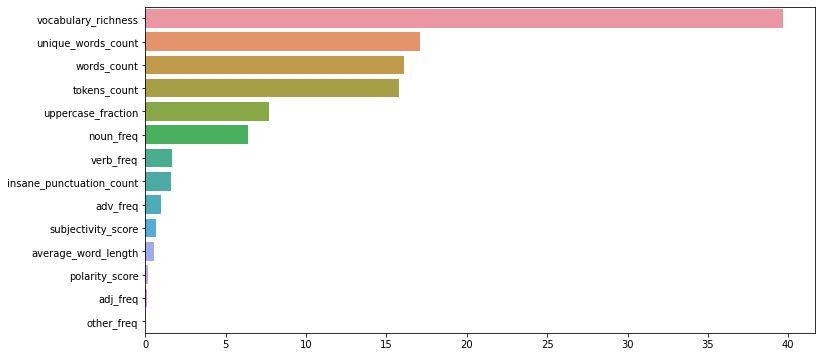

#### Using XGBoost

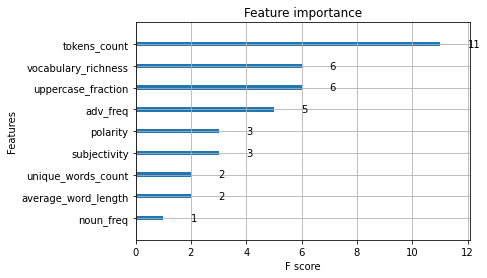

Here, the importance score says how many times that feature was used as a splitting feature in all the XGBoost's trees.

### Histograms of interesting features' values distributions

Words count

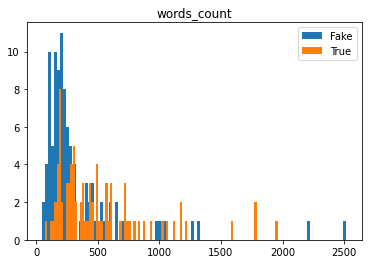

Vocabulary richness

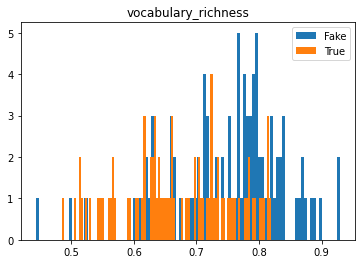

Uppercase fraction

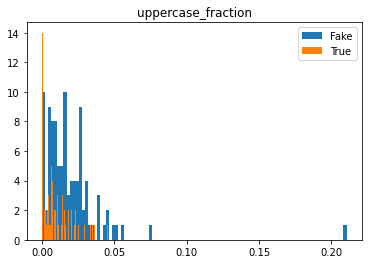

Subjectivity

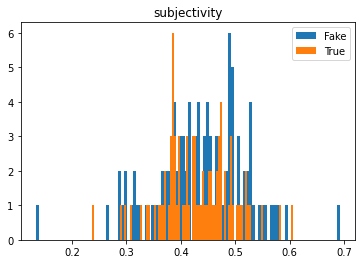

Noun frequency

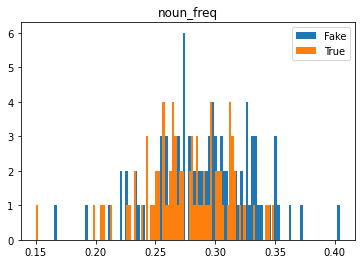

## Hand picked

In order to test to what degree our models try to recognise which site the article is from, we hand picked a testing set of 46 articles from sites that don't appear in the training set.

Legend:
- acc_rate - accuracy rate on testing set
- acc_on_training - accuracy rate on training set
- FN - number of false negatives **on testing set**
- FP - number of false positives **on testing set**

### Naive Bayes

In [ ]:
NB_df_stable

,acc_rate,FN,FP
numerical_calcs,86.96,6.0,0.0
2-grams,63.04,16.0,1.0
bag_of_words,71.74,8.0,5.0


### AdaBoost & XGBoost

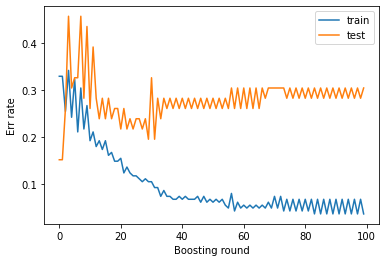

AdaBoost overfits a lot!

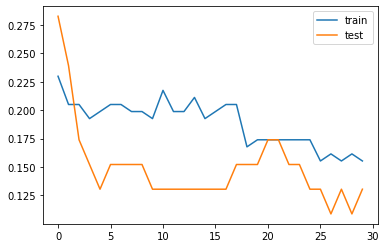

XGBoost helps with that - we can set 'learning_rate' parameter to be small.

,acc_rate,acc_on_training,FN,FP
Ada Boost,69.6,96.3,8.0,6.0
XGBoost,87.0,84.5,3.0,3.0


### Support Vector Machines

In [ ]:
SVM_handpicked

,acc_rate,acc_on_training,FN,FP
rbf kernel w/o bag of words,73.9,83.9,8.0,4.0
linear kernel w/ bag of words,84.8,100.0,4.0,3.0


## Leave-one-out

### Naive Bayes

In [ ]:
NB_df_leave_one_out

,acc_rate,FN,FP
numerical_calcs,64.73,49.0,24.0
2-grams,54.11,93.0,2.0
bag_of_words,78.26,22.0,23.0


### AdaBoost & XGBoost

,acc_rate,FN,FP
Ada Boost,69.6,32.0,31.0
XGBoost,68.4,32.0,33.0


### Support Vector Machines

In [ ]:
SVM_combined_llo

,acc_rate,FN,FP
rbf kernel w/o bag of words,72.0,35.0,23.0
linear kernel w/o bag of words,74.4,20.0,33.0
linear kernel w/ bag of words,80.0,27.0,15.0


# Dataset from Kaggle
"Fake and real news dataset": https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv

## Feature analysis

### Feature importance

#### Using SelectKBest

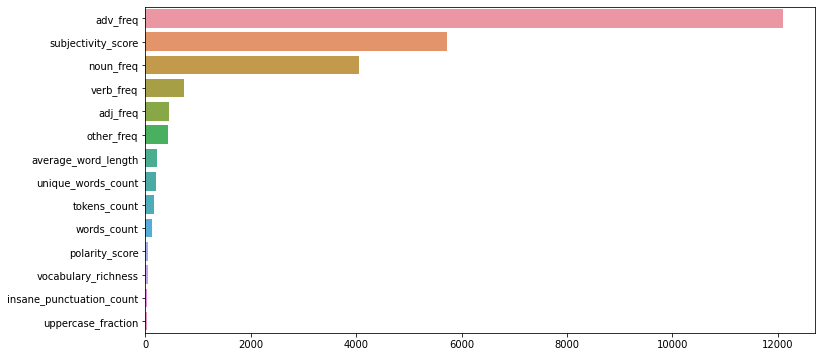

#### Using XGBoost

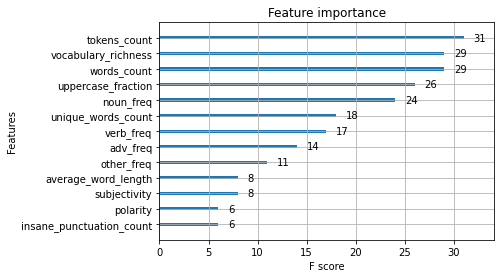

### Histograms of interesting features' values distribution.

Words count

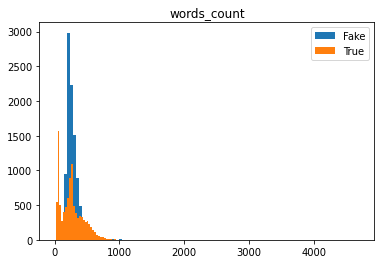

Adverbs frequency

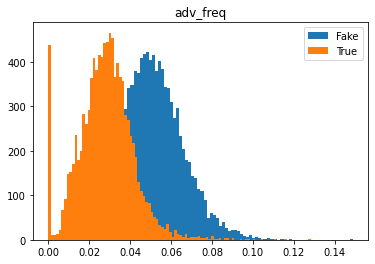

Nouns frequency

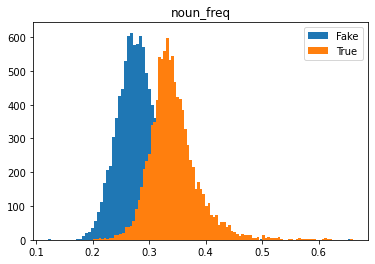

Verbs frequency

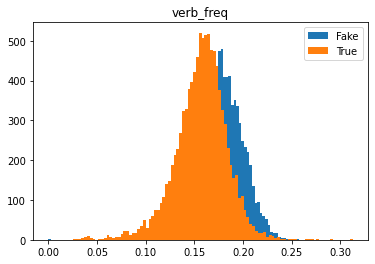

Subjectivity

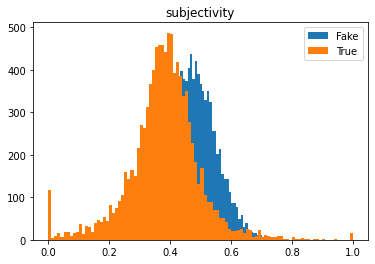

## Hold-out set

### Naive Bayes

In [ ]:
NB_df_kaggle

,acc_rate,FN,FP
numerical_calcs,60.35,43.0,116.0
2-grams,98.75,1.0,4.0
bag_of_words,96.76,5.0,8.0


### AdaBoost & XGBoost

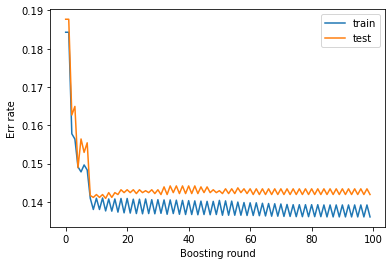

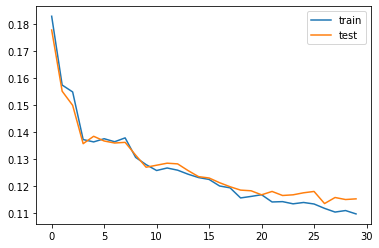

Here we don't overfit, because data is so similar!

,acc_rate,acc_on_training,FN,FP
Ada Boost,85.8,86.4,270.0,298.0
XGBoost,88.5,89.0,196.0,265.0


### Support Vector Machines

In [ ]:
SVM_kaggle

,acc_rate,acc_on_training,FN,FP
rbf kernel w/o bag of words,78.1,77.7,1255.0,1652.0
linear kernel w/o bag of words,83.8,84.3,822.0,1333.0


## Why it sucks

In [ ]:
def classify(article):
    if "Reuters" in article:
        return 1
    else:
        return -1

In [ ]:
misclassified = 0
for a in true:
    if classify(a) == -1:
        misclassified += 1
for a in fake:
    if classify(a) == 1:
        misclassified += 1

In [ ]:
size = len(true) + len(fake)
(size - misclassified) / size

0.9931333333333333

As you can see, the true articles were mostly scraped from Reuters, and they even have the name of the website in the text.

## Our dataset as testing set

We decided to test if model trained on kaggle dataset will perform well in real scenarios, even despite it's shortcomings.  
After all, maybe Reuter's style is similar to how other truthful news sources write articles.  
Fortunately, our dataset, even though too small to train a reliable model on, contains a range of articles from various sources. We can thus use it as a testing set.

In [ ]:
SVM_kaggle_our_tests

,acc_rate,FN,FP
linear kernel w/o bag of words,51.2,74.0,27.0
rbf kernel w/o bag of words,49.8,66.0,38.0


It turns out that model trained on kaggle dataset is no better than random guessing when it comes to real-life scenarios.

## Our dataset as training set

SVM with linear kernel got accuracy around 50%

In [ ]:
SVM_our_kaggle_tests

,acc_rate,FN,FP
rbf kernel w/o bag of words,60.4,12011.0,5473.0


In [ ]:
NB_kaggle_mix

,acc_rate,FN,FP
numerical_calcs,52.87,18089.0,2755.0
